In [15]:
import tensorflow as tf
import numpy as np

In [16]:
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
farenheit = np.array([-40,14,32,46,59,72,100], dtype= float)

# Red Neuronal


In [35]:
#en keras puedo esecificar la capa de salida, o las dos de entrada y 2 de salida
#capa = tf.keras.layers.Dense(units = 1, input_shape=[1])
#las capas densas son las que tienen conexiones desde una neurona a cada una de las neuronas de la siguiente capa
#inputshape autoregistar la capa de entrada con una neurona, units indica el numero de neuronas
#units hace referencia a las neuronas presentes en la capa

#agregando mas capa
oculta1 =  tf.keras.layers.Dense(units = 3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units= 3)
salida = tf.keras.layers.Dense(units= 1)



#necesito dar un modelo dekeras para darles las capas y poder trabajar con el
modelo = tf.keras.Sequential([oculta1, oculta2, salida])



In [36]:
#Una vez tenemos el modelo listo el siguiente paso el compilarlo, lo cual prepara el modelo para ser entrenado
#establecemos ciertas propiedades para poder indicarle como puede aprender mejor

#en este caso ponemos las propiedades optimizador u funcion de perdida

#usamos Adam para ajustar pesos y sesgos de manera eficiente de tal manera que asegure que el modelo aprende y no desaprende
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), # el valor numerico indca que tanto puede cambiar el valor numerico
    loss ='mean_squared_error' #esta funcion considera que  una poca cantidad de errores grandes es peor que una cantidad de grande de
    #errores pequeños
    )


In [37]:
print("comenzando el entrenamiento...")
historial =  modelo.fit(celsius, farenheit, epochs = 1000, verbose= False) #para entrenar el modelo utilizamos la funcion fit, indicamos los datos de entrada (celsius) y resultados esperados (farenheit)
print("¡Modelo entrenado!")


comenzando el entrenamiento...
¡Modelo entrenado!


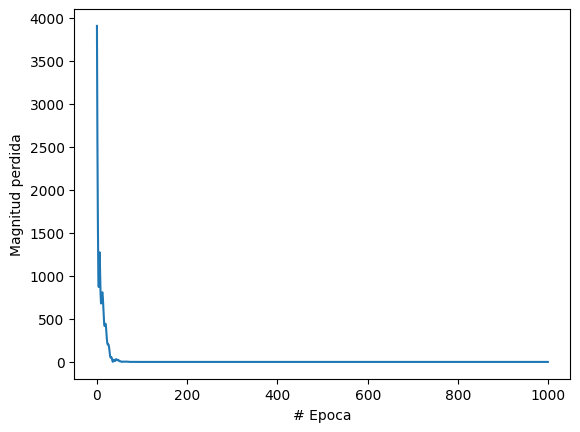

In [38]:
#Antes de hacer predicciones veamos el resultado de la funcion de perdida
#esta funcion nos dice que tan mal estan los resultados de la red en cada vuelta que dio
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud perdida")
plt.plot(historial.history["loss"])





In [39]:
#Tiempo de hacer la ´prediccion
print("Hagamos una prediccion")
#USAMOS LA funcion predict
resultado = modelo.predict([200.0])
print("El resltado es " + str(resultado) +  " Farenheit")

Hagamos una prediccion
1/1 [==============================] - 0s 62ms/step
El resltado es [[391.54236]] Farenheit


In [41]:
print("Variables internas del modelo ")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())


Variables internas del modelo 
[array([[ 0.21029076, -0.39516723,  0.46958518]], dtype=float32), array([-2.7497277, -3.4716585,  3.29081  ], dtype=float32)]
[array([[ 0.561438  , -0.13697167, -0.9061399 ],
       [ 1.3569412 ,  0.92572266, -0.605772  ],
       [-1.1442854 ,  0.8028113 ,  0.03711123]], dtype=float32), array([-3.3814843, -0.4575417,  2.4436798], dtype=float32)]
[array([[-1.842715  ],
       [-0.00517472],
       [ 0.56080824]], dtype=float32), array([3.237889], dtype=float32)]
